In [1]:
# Problema tomado del libro Analisis y Simulacion de Procesos de Himmelblau
# y Bischof.
# 
# Lo que se quiere es ejemplificar la situaciones que producen canalizacion
# o corto circuito y zonas muertas en reactores quimicos con patrones de
# flujo no ideal empleando el modelo de tanques CSTR en serie.
#
# La funcion E escrita para cada  uno de las ramas, donde f representa la
# particion del flujo de alimentacion

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
def ebranch(f, n, b, theta, m, alpha):
    ecurve = (f * n**n/math.factorial(n-1) * b**n * theta**(n-1) * np.exp(-n * b * theta) +
              (1 - f) * m**m/math.factorial(m - 1) * (b/alpha)**m * theta**(m-1) * 
              np.exp(-m * b / alpha * theta))
    return ecurve

def build_rtd(alpha, f, n, m, theta):
    b = f + (1-f) * alpha
    rtd = ebranch(f, n, b, theta, m, alpha)
    return rtd

# Mathematical representation of non-ideal flow using in-serie CSTRs

In [5]:
#           alpha  f    n   m
valores = [[0.10, 0.05, 15, 15],
           [0.20, 0.05, 15, 15], 
           [1.00, 0.05, 15, 15], 
           [5.00, 0.05, 15, 15], 
           [10.0, 0.05, 15, 15], 
           [0.10, 0.10, 15, 15],
           [0.10, 0.05, 5, 15]]

In [6]:
scenarios = np.shape(valores)[0]

In [7]:
theta = np.linspace(0, 3, 100) 

rtds = []
for scenario in range(scenarios):
    alpha, f, n, m = valores[scenario] 
    rtds.append(build_rtd(alpha, f, n, m, theta))

In [8]:
linestyles = ['solid', 'dotted', 'dashed', 'dashdot', 
              'dotted', 'dotted', 'dotted']
markers = ['None', 'None', 'None', 'None',
          'o', '>', '<']

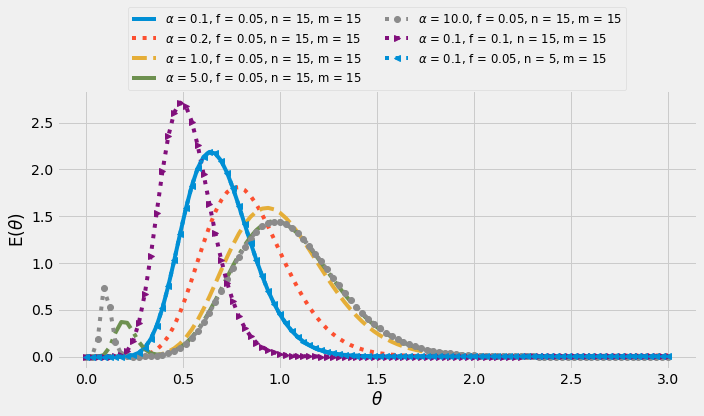

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))
for scenario in range(scenarios):
    alpha, f, n, m = valores[scenario] 
    ax.plot(theta, rtds[scenario], ls=linestyles[scenario], marker=markers[scenario],
            label=(r'$\alpha$ = %s, f = %s, n = %s, m = %s' % (alpha, f, n, m)))
ax.set_xlabel(r'$\theta$') 
ax.set_ylabel(r'E($\theta$)')
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center', borderaxespad=0., fontsize='small', ncol=2)
plt.tight_layout()
plt.show()